In [1]:
"""
this block is needed at the beginning of all notebooks to be able to load modules
"""
import os
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Automatically find and append the project root
root_path = Path.cwd().resolve().parents[1]  # adjust level as needed
data_path = os.path.join(root_path, "data")
src_path = os.path.join(root_path, "src")

if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

In [2]:
from signal_modules.signal_registry import SignalRegistry

In [3]:
signal_registry = SignalRegistry()

In [4]:
signal_registry.available_signals()

['ma_crossover', 'Kalman']

In [5]:
#model = signal_registry.get('ma_crossover')()
model = signal_registry.get('Kalman')()

In [6]:
initial_time = pd.to_datetime('2000-01-01T12:00:00+00:00')
initial_time

Timestamp('2000-01-01 12:00:00+0000', tz='UTC')

In [7]:
tickers = ['SPY', 'TSLA', 'NVDA', 'BRK-B']  # List of tickers
data_files = [os.path.join(data_path, f"{ticker}.parquet") for ticker in tickers]
data = {ticker: pd.read_parquet(path).loc[initial_time:] for ticker, path in zip(tickers, data_files)}

                                SPY          TSLA      NVDA     BRK-B
date                                                                 
2000-01-03 00:00:00+00:00  0.000000  0.000000e+00  0.000000  0.000000
2000-01-04 00:00:00+00:00 -0.722209  1.022686e-17 -0.000478 -0.244000
2000-01-05 00:00:00+00:00 -0.532878 -1.998063e-17 -0.002695  0.255679
2000-01-06 00:00:00+00:00 -1.080102 -2.154100e-17 -0.004219  0.991544
2000-01-07 00:00:00+00:00  0.702667  9.714303e-18 -0.001700  0.145816
...                             ...           ...       ...       ...
2025-05-07 00:00:00+00:00  0.663710 -1.164489e+00  2.863981  1.277871
2025-05-08 00:00:00+00:00  3.256007  7.391597e+00  0.458394 -3.364289
2025-05-09 00:00:00+00:00 -0.713051  1.115412e+01 -0.537558 -1.679620
2025-05-12 00:00:00+00:00  9.236355  1.155447e+01  3.448369 -1.783136
2025-05-13 00:00:00+00:00  4.646573  1.455324e+01  6.770095 -2.014560

[6379 rows x 4 columns]


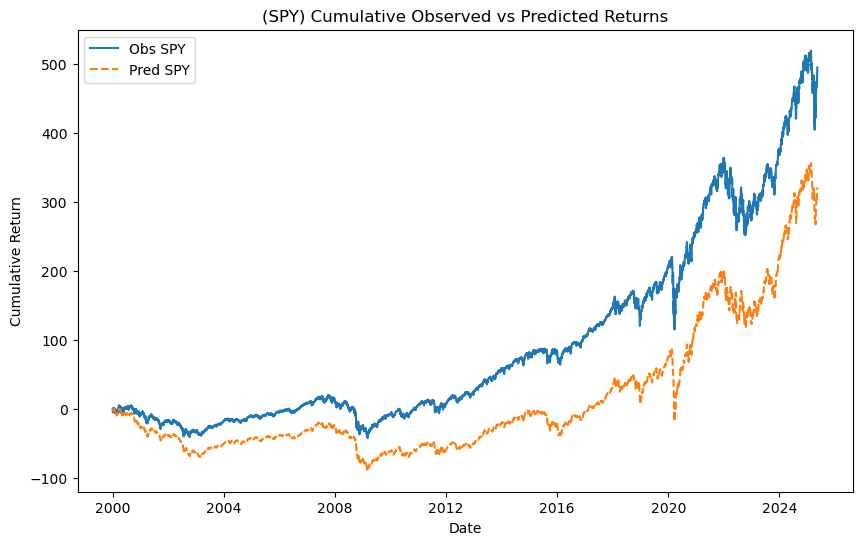

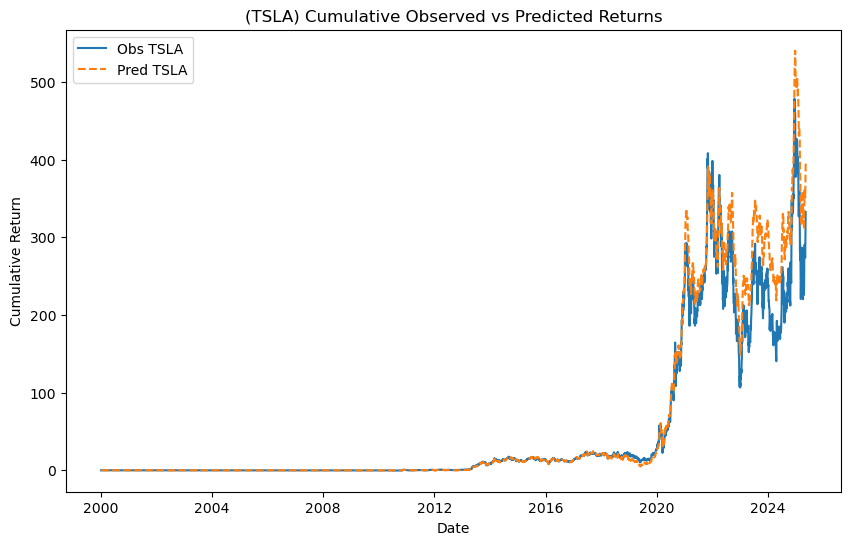

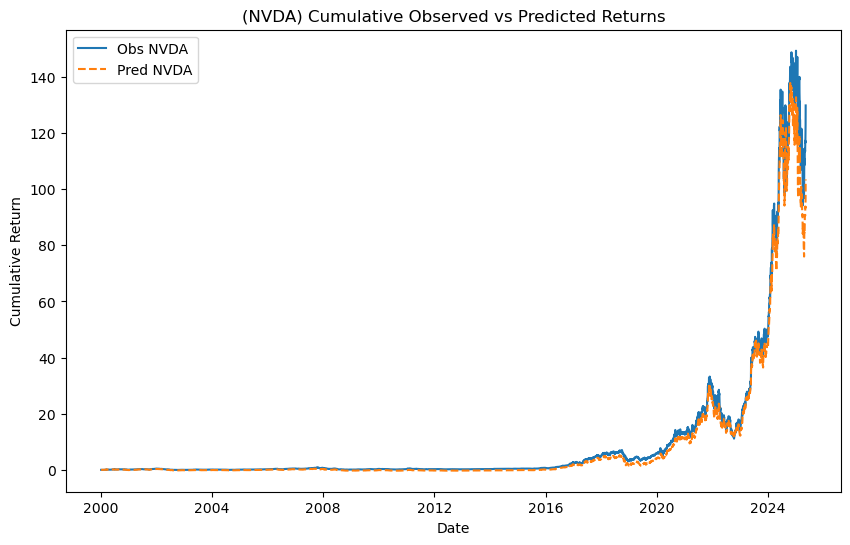

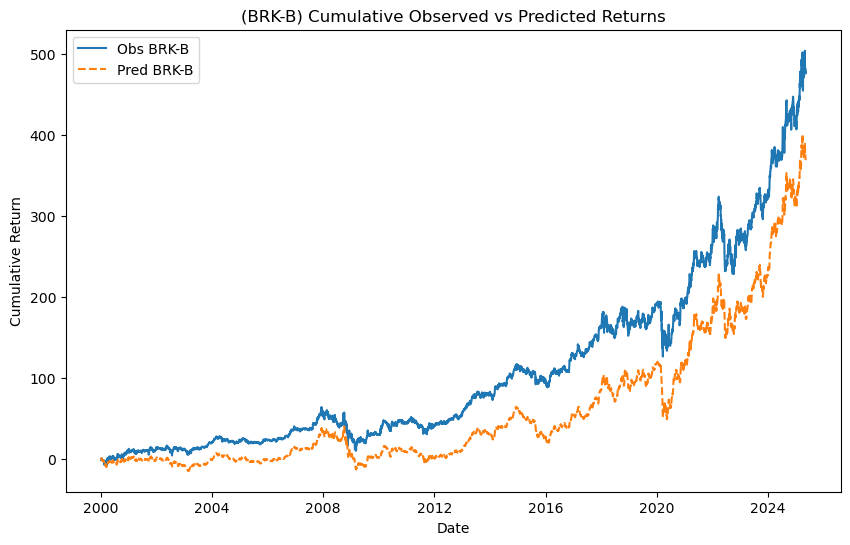

In [8]:
sigs = model.generate_signals(data, diagnostics=True)

In [9]:
sigs

{'SPY': date
 2000-01-03 00:00:00+00:00    0.541667
 2000-01-04 00:00:00+00:00    0.258603
 2000-01-05 00:00:00+00:00    0.289444
 2000-01-06 00:00:00+00:00    0.194266
 2000-01-07 00:00:00+00:00    0.849278
                                ...   
 2025-05-07 00:00:00+00:00    0.501896
 2025-05-08 00:00:00+00:00    0.682208
 2025-05-09 00:00:00+00:00    0.436542
 2025-05-12 00:00:00+00:00    0.831524
 2025-05-13 00:00:00+00:00    0.630284
 Name: buy_confidence, Length: 6379, dtype: float64,
 'TSLA': date
 2000-01-03 00:00:00+00:00    0.541667
 2000-01-04 00:00:00+00:00    0.824730
 2000-01-05 00:00:00+00:00    0.405305
 2000-01-06 00:00:00+00:00    0.414074
 2000-01-07 00:00:00+00:00    0.620799
                                ...   
 2025-05-07 00:00:00+00:00    0.376810
 2025-05-08 00:00:00+00:00    0.821019
 2025-05-09 00:00:00+00:00    0.872545
 2025-05-12 00:00:00+00:00    0.870600
 2025-05-13 00:00:00+00:00    0.896798
 Name: buy_confidence, Length: 6379, dtype: float64,
 'NVDA': 